In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

In [18]:
#한글 폰트 적용하기/ 보통  맑은 고딕체 사용
from matplotlib import font_manager, rc
font = 'C:/Windows/Fonts/Malgun.ttf'
font_name = font_manager.FontProperties(fname=font).get_name()
rc('font', family=font_name)
warnings.filterwarnings('ignore')
sns.set_palette('Paired')

In [ ]:
titanic=pd.read_csv('../data/titanic.csv')
print(titanic.info())
titanic

In [11]:
titanic['Age'].describe()


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
# 데이터 714개 , 누락값 있음
# 평균 29.7, 표준편차는 14.5 
# 데이터 편향되지 않음- 평균과 중앙값 비교
# 사순위수를 보면 3사분기와 최댓값의 차이가 큰 것을 보면 이상치가 있을 가능성 높음

<Axes: xlabel='Age'>

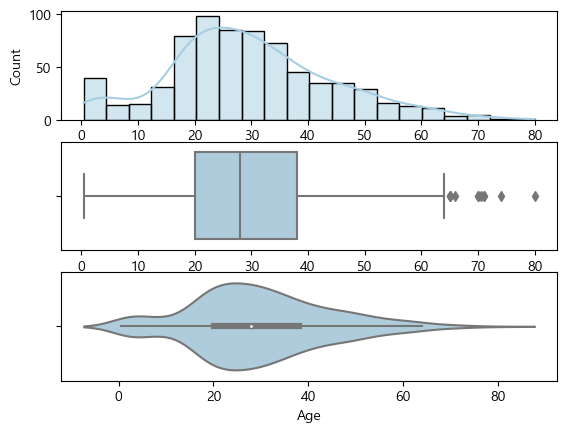

In [27]:
plt.subplot(3,1,1)
sns.histplot(data=titanic, x='Age', kde=True)
plt.subplot(3,1,2)
sns.boxplot(data=titanic, x='Age')
plt.subplot(3,1,3)
sns.violinplot(data=titanic, x='Age')

In [40]:
arr=np.random.randn((200))  #정규분포를 따르는 random.randn 

<Axes: ylabel='Density'>

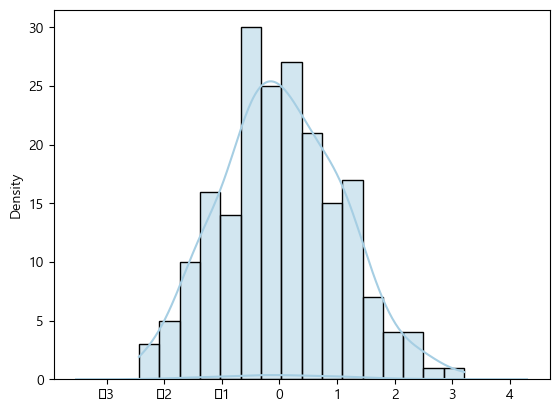

In [39]:
sns.kdeplot(arr)
sns.histplot(arr, bins=16,kde=True)

In [45]:
titanic['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<Axes: xlabel='Fare'>

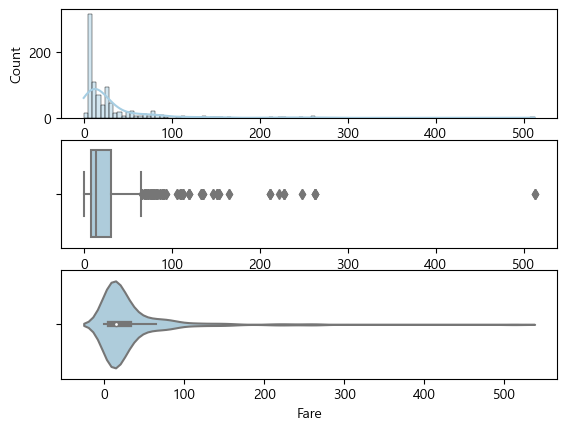

In [46]:
plt.subplot(3,1,1)
sns.histplot(data=titanic, x='Fare', kde=True)
plt.subplot(3,1,2)
sns.boxplot(data=titanic, x='Fare')
plt.subplot(3,1,3)
sns.violinplot(data=titanic, x='Age')

In [48]:
from scipy import stats
stats.shapiro(titanic['Fare'])

ShapiroResult(statistic=0.5218917727470398, pvalue=1.0789998175301091e-43)

In [49]:
stats.shapiro(arr)

ShapiroResult(statistic=0.9931449890136719, pvalue=0.47943583130836487)

In [51]:
stats.anderson(titanic['Fare'])

AndersonResult(statistic=122.16962721459197, critical_values=array([0.573, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=32.204207968574636, scale=49.693428597180905)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [52]:
stats.anderson(arr)  # 정규분포 검정/ 결과 보는 것은 조심할 것

AndersonResult(statistic=0.35298344001313353, critical_values=array([0.565, 0.644, 0.772, 0.901, 1.071]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=-0.03955724600540186, scale=0.8985738204078382)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')

In [57]:
print(titanic['Pclass'].value_counts())


Pclass
3    491
1    216
2    184
Name: count, dtype: int64


In [60]:
print(titanic['Pclass'].value_counts() / len(titanic['Pclass']))

Pclass
3    0.551066
1    0.242424
2    0.206510
Name: count, dtype: float64


([<matplotlib.patches.Wedge at 0x22bd53c2090>,
 [Text(-0.17571616709359641, 1.0858746836637898, '3'),
  Text(-0.5160762002061153, -0.9714243951954356, '1'),
  Text(0.8765111456658484, -0.6646263698677192, '2')],
 [Text(-0.09584518205105258, 0.5922952819984307, '55.11%'),
  Text(-0.2814961092033356, -0.5298678519247829, '24.24%'),
  Text(0.47809698854500815, -0.3625234744733013, '20.65%')])

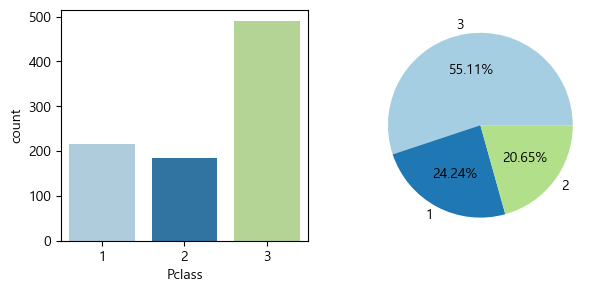

In [58]:
p_cnt = titanic['Pclass'].value_counts()
plt.figure(figsize = (7, 3))
plt.subplot(1,2,1)
sns.countplot(data = titanic, x = 'Pclass')
plt.subplot(1,2,2)
plt.pie(p_cnt.values, labels = p_cnt.index, autopct = '%.2f%%') 

In [63]:
# 이상치 판단/ IQR
IQR=titanic['Fare'].quantile(0.75) - titanic['Fare'].quantile(0.25)
high_border = titanic['Fare'].quantile(0.75) + IQR * 1.5
low_border =  titanic['Fare'].quantile(0.25) - IQR * 1.5
print(high_border,row_border )

65.6344 -26.724


ShapiroResult(statistic=0.8130143880844116, pvalue=5.0145173146643107e-29)


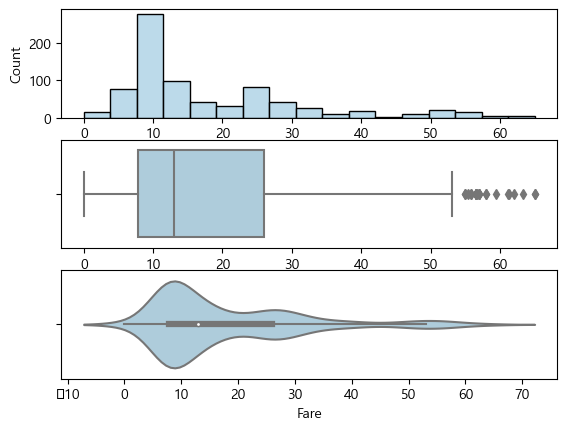

In [64]:
titanic_1 = titanic[(titanic['Fare'] < high_border) & (titanic['Fare'] > low_border)]
plt.subplot(3,1,1)
sns.histplot(data = titanic_1, x = 'Fare')
plt.subplot(3,1,2)
sns.boxplot(data = titanic_1, x = 'Fare')
plt.subplot(3,1,3)
sns.violinplot(data = titanic_1, x = 'Fare')
print(stats.shapiro(titanic_1['Fare']))

In [ ]:
## 이상치 제거 // 
import numpy as np
# numpy
z_score = np.abs(titanic['Fare'] - titanic['Fare'].mean()) / titanic['Fare'].std()

In [96]:
titanic3 = titanic[z_score < 0.7]

In [97]:
titanic3.shape

(777, 12)

<Axes: xlabel='Fare'>

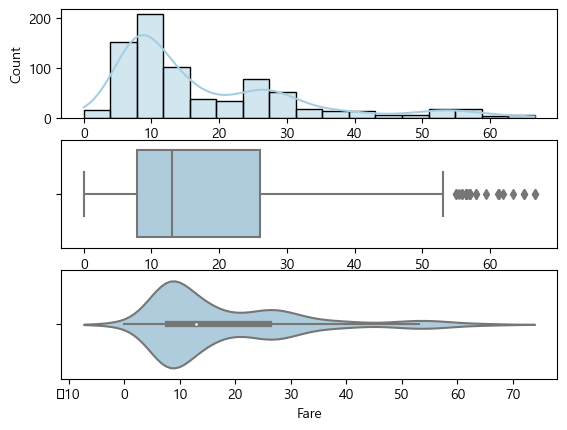

In [98]:
plt.subplot(3,1,1)
sns.histplot(data=titanic3, x='Fare', kde=True)
plt.subplot(3,1,2)
sns.boxplot(data=titanic3, x='Fare')
plt.subplot(3,1,3)
sns.violinplot(data=titanic3, x='Fare')

In [113]:
titanic3['Fare'].max()

66.6

In [114]:
titanic['Fare'].max()

512.3292

In [116]:
titanic_1['Fare'].max()

65.0

In [121]:
stats.anderson(titanic['Age'])

AndersonResult(statistic=nan, critical_values=array([0.573, 0.653, 0.784, 0.914, 1.087]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=29.69911764705882, scale=14.526497332334044)
 success: False
 message: 'Optimization converged to parameter values that are inconsistent with the data.')

In [122]:
titanic_na=titanic['Age'].dropna()

단변량(일변량) 데이터 분석 방법
<수치형(연속형) 데이터>
1. 기초통계량 : 평균, 표준편차, 4분위수, 최대값, 최소값
2. 그래프: 히스토그램, 밀도곡선, 박스그래프
3. 정규성 검정(shapiro, Anderson)
   : 이변량데이터분석에서 수치형 데이터가 정규성 유무로
     통계 검정함수가 달라지기 때문에 해봐야

<범주형 데이터>
1. 기초통계값
   :개별(범주별), 비율
2. 그래프
   : 막대그래프(countplot), pie
3. 별도의 검정은 없고 /범주별 비율이 균등한지를 확인하고 데이터분석을 진행 함


<이상치 제거>
1. z_score
2. 이상치 판단/ IQR 이용해서 제거   